# `nb03c`: Visualizing high-dimensional data

# Dimensionality reduction

Visualizing high-dimensional data is a challenge, as it is difficult to visualize more than 2 dimensions. One way to visualize high-dimensional data is to use dimensionality reduction techniques to reduce the data to 2 dimensions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
X.shape

(1083, 64)

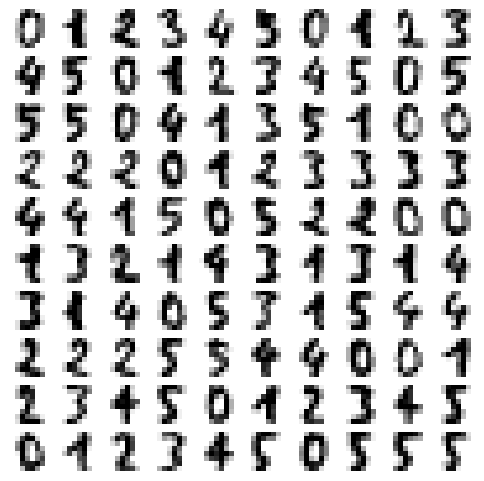

In [3]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

plt.show()

In [4]:
# Helper
from sklearn.preprocessing import MinMaxScaler
from matplotlib import offsetbox

def plot_embedding(X):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.axis("off")
    plt.show()

## PCA

Principal component analysis (PCA) is a dimensionality reduction technique that finds the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(X)
Xt.shape

(1083, 2)

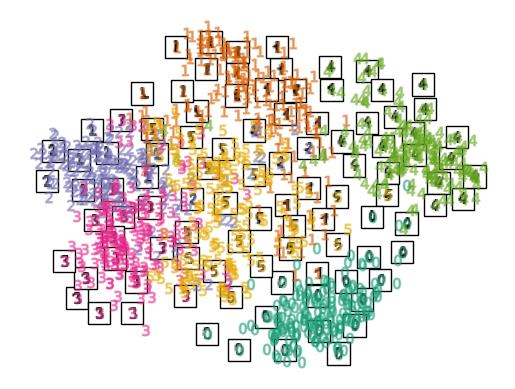

In [6]:
plot_embedding(Xt)

Mathematically, consider a dataset $X \in \mathbb{R}^{n \times d}$. The goal of PCA is to identify a orthogonal linear transformation $U \in \mathbb{R}^{d \times k}$ that minimizes the reconstruction error of the data when projected onto a $k$-dimensional subspace. That is, $$\min_{U} \sum_{i=1}^n ||X_i - UU^TX_i||^2$$ subject to $U^TU = I$.

## MDS

Multi-dimensional scaling (MDS) is a dimensionality reduction technique that finds a 2D representation of high-dimensional data that preserves the distances between the data points. 

In [7]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
Xt = mds.fit_transform(X)
Xt.shape

/home/glouppe/anaconda3/envs/dats0001/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(1083, 2)

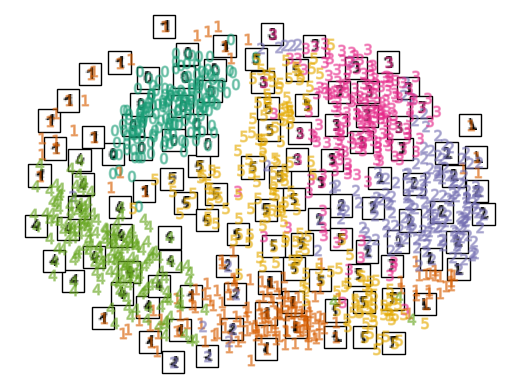

In [8]:
plot_embedding(Xt)

## t-SNE

T-distributed stochastic neighbor embedding (t-SNE) is a dimensionality reduction technique that finds a 2D representation of high-dimensional data that preserves the local structure of the data. 

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init="pca", learning_rate="auto")
Xt = tsne.fit_transform(X)
Xt.shape

(1083, 2)

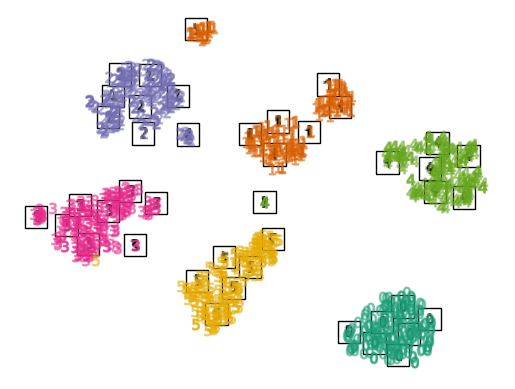

In [10]:
plot_embedding(Xt)

See also [Wattenberg et al, 2016](https://distill.pub/2016/misread-tsne/) on how to use t-SNE effectively.